In [ ]:
# 2023-12
# poking at an Erdos paper on arithmetic complexity

In [211]:
from collections import defaultdict
from functools import cache
from scipy.special import comb
from numpy import power

In [170]:
from matplotlib import pyplot as plt

In [212]:
def extend(cx, cap=None):
    for x in range((cx+1)//2):
        y = cx - 1 - x
        for n in num_by_cx[x]:
            for m in num_by_cx[y]:
                new = {power(n, m), power(m, n), m*n, m+n}
                new = set(k for k in new if not done[k] and (cap is None or k <= cap))
                num_by_cx[cx].update(new)
                for k in new:
                    done[k] = True

In [217]:
num_by_cx = defaultdict(lambda:set())
num_by_cx[0] = {1.}
done = defaultdict(lambda:False)
done[1.] = True

In [218]:
for cx in range(20):
    extend(cx, cap=None)

/tmp/ipykernel_24340/3240491212.py:6: RuntimeWarning: overflow encountered in power
  new = {power(n, m), power(m, n), m*n, m+n}
/tmp/ipykernel_24340/3240491212.py:6: RuntimeWarning: overflow encountered in scalar multiply
  new = {power(n, m), power(m, n), m*n, m+n}


In [219]:
[(cx, len(num_by_cx[cx])) for cx in num_by_cx]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 4),
 (5, 4),
 (6, 12),
 (7, 27),
 (8, 51),
 (9, 129),
 (10, 259),
 (11, 549),
 (12, 1215),
 (13, 2567),
 (14, 5639),
 (15, 12253),
 (16, 26501),
 (17, 57782),
 (18, 125180),
 (19, 272086)]

In [199]:
num_by_cx[9]

ValueError: Exceeds the limit (4300) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit

In [105]:
[min(num_by_cx[cx]) for cx in range(23)]

[1,
 2,
 3,
 4,
 5,
 7,
 11,
 13,
 21,
 23,
 41,
 43,
 71,
 94,
 139,
 211,
 215,
 431,
 863,
 1437,
 1868,
 2855,
 5737]

In [169]:
@cache
def l1(k):
    if k == 0:
        return 1
    return sum([l1(j) * l1(k - 1 - j) for j in range(k)])

def l1_closed(k):
    return comb(2*k, k, True) // (k+1)

@cache
def l2(k):
    if k == 0:
        return 1
    return 4 * sum([l2(j) * l2(k - 1 - j) for j in range((k+1)//2)])

In [175]:
?plt.plot

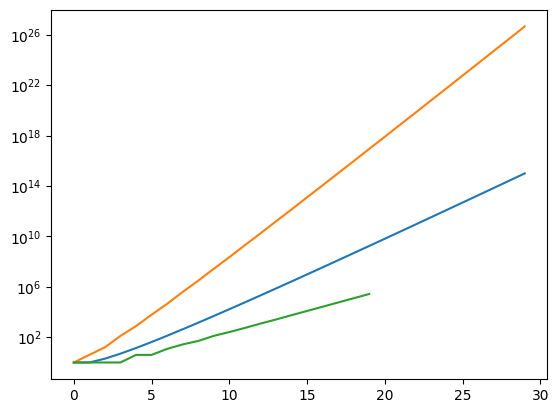

In [221]:
plt.semilogy([l1(k) for k in range(30)])
plt.semilogy([l2(k) for k in range(30)])
plt.semilogy([len(num_by_cx[k]) for k in range(20)])

In [167]:
[(len(num_by_cx[k]),l1(k),l1_closed(k),l2(k)) for k in num_by_cx]

[(1, 1, 1, 1),
 (1, 1, 1, 4),
 (1, 2, 2, 16),
 (1, 5, 5, 128),
 (4, 14, 14, 768),
 (4, 42, 42, 6144),
 (12, 132, 132, 45056),
 (27, 429, 429, 393216),
 (49, 1430, 1430, 3080192),
 (119, 4862, 4862, 27000832)]

In [208]:
{cx:(num_by_cx[cx]) for cx in num_by_cx}

{0: {1},
 1: {2},
 2: {3},
 3: {4},
 4: {5, 6, 8, 9},
 5: {7, 10, 16, 27},
 6: {11, 12, 17, 18, 25, 28, 32, 36, 64, 81, 256, 512},
 7: {13,
  14,
  15,
  19,
  20,
  24,
  26,
  29,
  33,
  37,
  49,
  54,
  65,
  82,
  100,
  125,
  128,
  216,
  243,
  257,
  513,
  729,
  1024,
  6561,
  19683,
  65536,
  134217728},
 8: {21,
  22,
  30,
  34,
  38,
  48,
  50,
  55,
  56,
  66,
  72,
  83,
  101,
  121,
  126,
  129,
  144,
  162,
  217,
  244,
  258,
  289,
  324,
  343,
  514,
  625,
  730,
  784,
  1000,
  1025,
  1296,
  2048,
  2187,
  4096,
  6562,
  19684,
  59049,
  65537,
  131072,
  262144,
  33554432,
  43046721,
  134217729,
  268435456,
  4294967296,
  68719476736,
  7625597484987,
  18446744073709551616,
  2417851639229258349412352},
 9: {23,
  31,
  35,
  39,
  40,
  45,
  51,
  52,
  57,
  58,
  67,
  73,
  74,
  75,
  84,
  96,
  98,
  102,
  108,
  122,
  127,
  130,
  145,
  163,
  164,
  169,
  192,
  196,
  200,
  218,
  225,
  245,
  250,
  259,
  290,
  325,
